# **Hands-On Exercise: Building Your First Artificial Neural Network**

Understand the core concepts of building an artificial neural network. Get comfortable with the architecture of neurons and layers. Experience the process of training and evaluating a model.

## **Prerequisites**
Basic Python programming concepts (variables, functions, loops). A general understanding of what machine learning is.

In [1]:
import numpy as np

# **Activation Function**
def sigmoid(x):
    """Calculates the sigmoid activation for input values.
    The sigmoid function 'squashes' values between 0 and 1.
    This helps our neural network learn complex, non-linear patterns.
    """
    return 1 / (1 + np.exp(-x))

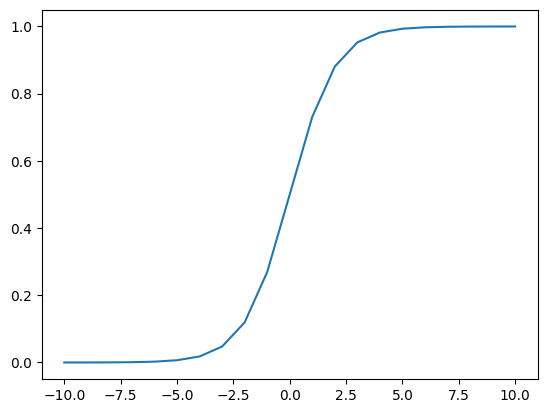

In [18]:
import matplotlib.pyplot as plt
import numpy as np

input_list = [i for i in np.arange(-10, 11, 1)]
output_list = [1 / (1 + np.exp(-i)) for i in input_list]

plt.plot(input_list, output_list)
plt.show()

Note that in Python:
- Triple-quoted strings (''' ... ''' or """ ... """) placed immediately after a function, method, class, or module definition are interpreted as __docstrings__.
- A docstring is a special kind of string used to document what the function/class/module does.
- Python doesn’t treat it as a code statement to be executed—rather, it’s stored as .__doc__ attribute of the function and is used by tools like help().

Now that we've defined the Sigmoid activation function, let's move on to defining our next function, `train()` which will define and trains a very simple feedforward neural network with one hidden layer using sigmoid activation and manual weight updates via backpropagation.
![](Lesson1SimpleNN.png)

In [2]:
# **Training the Neural Network**
def train(X, y, hidden_neurons, output_neurons, epochs, learning_rate):
    """Trains a simple neural network.

    Args:
        X: Input data (features).
        y: True labels/outputs associated with the input data (target).
        hidden_neurons: Number of neurons (nodes) in the hidden layer.
        output_neurons: Number of neurons (nodes) in the output layer.
        epochs: Number of times to train over full dataset.
        learning_rate: Controls how much we update weights during each iteration.
    """

    # **Initialize weights with random values**
    input_weights = np.random.randn(X.shape[1], hidden_neurons) # generate weight matrix for connections between input & hidden layer
    hidden_weights = np.random.randn(hidden_neurons, output_neurons) # generate weight matrix for connections between hidden & output layer

    # **Training Loop over given number of Epochs**
    for _ in range(epochs):
        # **Forward Propagation**
        # Calculate input to the hidden layer
        hidden_layer_input = np.dot(X, input_weights) # dot product/matrix multiplication between input data & input weights
        # Apply the sigmoid activation to the hidden layer input
        hidden_layer_output = sigmoid(hidden_layer_input)

        # Calculate hidden to the output layer
        output_layer_input = np.dot(hidden_layer_output, hidden_weights)
        # Apply the sigmoid activation to get the final predicted output
        output = sigmoid(output_layer_input)

        # **Backpropagation**
        # Calculate how much our prediction was off
        output_error = y - output
        # Calculate the output layer gradient (how much to change output weights)
        output_delta = output_error * output * (1 - output)

        # Calculate the hidden layer error (how wrong were hidden layer outputs)
        hidden_error = np.dot(output_delta, hidden_weights.T)
        # Calculate the hidden layer gradient (how much to change hidden weights)
        hidden_delta = hidden_error * hidden_layer_output * (1 - hidden_layer_output)

        # **Update weights (adjust weights to reduce error)**
        hidden_weights += learning_rate * np.dot(hidden_layer_output.T, output_delta) # dot product to update weights for all nodes at once
        input_weights += learning_rate * np.dot(X.T, hidden_delta)

    return input_weights, hidden_weights

Some footnotes on the code above:
- `X.shape[1]` - If X is a Pandas DataFrame (or a NumPy 2D array), then: X.shape returns a tuple of (number of rows, number of columns), so X.shape[1] will return number of columns = number of input nodes in the first layer (input layer of our NN model).
- `np.random.randn(X.shape[1], hidden_neurons)` - Generates a matrix of shape (a, b) filled with random values, where a = number of feature columns in input data and b = hidden layer nodes passed as an argument to the function.
- Weights update:
    - `output_error = y - output` - Measures how wrong the prediction is. This is the derivative of the loss function.
    - `output * (1 - output)` - First order derivative of the sigmoid function. σ′(x)=σ(x)⋅(1−σ(x))
    - `output_delta = output_error * output * (1 - output)` - Chain rule is being applied to calculate the _Loss w.r.t. weights_ which tells how much to change output layer weights.
        - __Loss w.r.t. weights = Loss w.r.t. output × output w.r.t. activation input__
- `hidden_error` - We can't directly compare the hidden layer's output with the true label — because the hidden layer doesn't produce predictions. So instead, we pass the output layer's error backward into the hidden layer — using the output weights.
    - We do this by: Taking the output_delta (how much each output neuron needs to change). And projecting it backwards through the weights between hidden and output layers. The .T (transpose) is used to align the matrix shapes properly.
- `hidden_weights` - This is essentially the implementation of new_weights = old_weights - learning_rate * gradient. We're using weights += learning_rate * negative_gradient due to our negative gradient computed earlier.

In [3]:
# **Using the Trained Network**
def predict(X, input_weights, hidden_weights):
    """Makes predictions using the trained neural network."""
    hidden_layer_input = np.dot(X, input_weights) # uses input_weights from train() function earlier
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, hidden_weights) # uses hidden_weights from train() function earlier
    output = sigmoid(output_layer_input)
    return output # return final prediction of network

In [4]:
# Example usage with a very simple dataset (XOR boolean logic)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])  # Simple XOR function

# Train network with 2 hidden layer nodes, 1 output layer node for 0/1 prediction
# Train over 10k full cycles and 0.1 step size for weights adjustment
input_weights, hidden_weights = train(X, y,
                                      hidden_neurons=2,
                                      output_neurons=1,
                                      epochs=10000,
                                      learning_rate=0.1)

new_input = np.array([[1, 1]])
print(predict(new_input, input_weights, hidden_weights))

[[0.51528397]]


Numpy arrays for `X` and `y` are defining this.
Sample XOR problem - __Exclusive OR__ Logical Operation, where the Output is 1 only if exactly one input is 1 (i.e., the inputs are different).

| Input A | Input B | Output: A XOR B |
|---------|---------|---------|
|    0    |    0    |    0    |
|    0    |    1    |    1    |
|    1    |    0    |    1    |
|    1    |    1    |    0    |

## Demystifying the Neural Network: A Breakdown

Imagine a simple brain with interconnected processing units (neurons) mimicking how we learn. This code builds a basic version of that. Let's break it down:

* **Input Layer:** This is where we feed data (like numbers) into the network. For the XOR example, this layer takes two numbers (0 or 1) as input.
* **Hidden Layer(s):**  These are the heart of the network, containing multiple interconnected neurons. They perform calculations and transformations on the data.
* **Output Layer:** Here, the final prediction or answer from the network emerges. In the XOR case, the output layer has one neuron, predicting a 0 or a 1.

**Activation Function:**  This function acts like a gatekeeper, controlling how strongly a neuron "fires" based on its calculations. It introduces non-linearity, allowing the network to learn complex patterns.
   * **Sigmoid Function:** A common activation function, it 'squashes' input values into a range between 0 and 1. This helps in tasks like predicting probabilities (in this case, the probability of the output being 0 or 1).

**Learning Process:**

1. **Forward Propagation:**  Information flows from input, through hidden layers (with calculations at each step), and reaches the output.
2. **Backward Propagation (Backprop):**  We compare the output with the correct answer (like a teacher grading a test). Backprop helps the network adjust the connections between neurons (like rewiring) to minimize errors in future predictions.

**Cost Function:**  (Not explicitly coded here, but plays a role in backpropagation). This function measures how wrong the network's prediction was. Backprop uses this to determine how much to adjust the connections.

**What is the network predicting?**

The network is essentially learning a rule for the XOR function. XOR outputs a 1 only when the two inputs are different (0, 1) or (1, 0). In any other case (both 0s or both 1s), the XOR function outputs a 0. The goal of the network is to train the hidden layer neurons to process the input values and activate the output neuron accordingly, mimicking this XOR logic.

**Through many training iterations (epochs) with adjustments based on backprop, the network gradually learns to make better predictions!**

## A Better Model
The above neural network did not do a very good job at '*learning*' and then '*predicting*' the correct output of 0, when given an input of (1, 1).

The next model below will do a better job at that. It includes potential changes to improve prediction performance over the first (XOR-based) example.

In [5]:
# ... (predict function remains the same) ...

# Example usage with adjusted parameters
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

input_weights, hidden_weights = train(X, y,
                                      hidden_neurons=3, # increase hidden layer nodes
                                      output_neurons=1,
                                      epochs=20000, # increasing training epochs
                                      learning_rate=0.05) # invoke with smaller learning rate

new_input = np.array([[1, 1]])
print(predict(new_input, input_weights, hidden_weights))

[[0.12320691]]


**Changes Made:**

* **More Hidden Neurons:** Increased to 3 for slightly more modeling capacity.
* **Increased Epochs:** 20000 epochs provide more training time.
* **Decreased Learning Rate:** A smaller learning rate (0.05) takes smaller steps to avoid overshooting good solutions.

**Caveats**

* **XOR Problem:** Even with these changes, the basic XOR dataset may not be the best for showcasing the network's power.
* **Hyperparameter Experimentation:** The best settings for neurons, epochs, and learning rate are found through experimentation.

**Further Improvement Ideas**

* **Add a Second Hidden Layer:** Makes the network more complex to handle nonlinear patterns.
* **Early Stopping:** Implement a basic early stopping check to prevent overfitting if performance on a held-out validation set worsens.